In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import statsmodels

import scipy
from scipy import stats

In [2]:
titanicdf = pd.read_csv('titanic.csv');
titanicdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanicdf.shape

(891, 12)

In [4]:
titanic_df = titanicdf[['Sex', 'Survived']]

In [5]:
titanic_df.head()

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0


In [6]:
# binarization?
titanic_df['Sex'] = titanic_df['Sex'].astype('category', copy = False).cat.codes
titanic_df.head()

C:\Users\wlmro\AppData\Local\Temp/ipykernel_10532/4261483400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Sex'] = titanic_df['Sex'].astype('category', copy = False).cat.codes


,Sex,Survived
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0


In [7]:
titanic_df.isnull().any()

Sex         False
Survived    False
dtype: bool

In [8]:
titanic_df = titanic_df.dropna()
titanic_df.shape

(891, 2)

In [9]:
features = titanic_df[['Sex', 'Survived']]
labels = titanic_df['Survived']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# features = x, labels = y
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)
x_train.shape, y_train.shape

((712, 2), (712,))

In [12]:
# without caring about the Sex of the individuals
survival_num_train = y_train.value_counts()
survival_num_train

0    430
1    282
Name: Survived, dtype: int64

In [13]:
# take the count of all who survived and divide it by the count of all individuals...then multiply by 100
survival_prob_train = survival_num_train[1] / len(y_train) * 100
survival_prob_train

39.60674157303371

In [14]:
# do the same to the test data...then compare probabilities
survival_num_test = y_test.value_counts()
survival_num_test

0    119
1     60
Name: Survived, dtype: int64

In [15]:
# probabilities are approximately equal
survival_prob_test = survival_num_test[1] / len(y_test) * 100
survival_prob_test

33.5195530726257

In [16]:
# get the values for men/male from the test data
x_test_men = x_test.loc[x_test['Sex'] == 1]
x_test_men.shape, x_test.head()

((120, 2),
      Sex  Survived
 544    1         0
 236    1         0
 238    1         0
 145    1         0
 444    1         1)

In [17]:
# get the values for women/female from the test data
x_test_women = x_test.loc[x_test['Sex'] == 0]
x_test_women.shape, x_test_women.head()

((59, 2),
      Sex  Survived
 49     0         0
 167    0         0
 458    0         1
 268    0         1
 535    0         1)

In [18]:
# get the probabilty that those who survive are men from the test data
survival_num_men_test = x_test_men['Survived'].value_counts()
survival_num_men_test

0    101
1     19
Name: Survived, dtype: int64

In [19]:
survival_prob_men_test = survival_num_men_test[1] / len(x_test_men['Survived']) * 100
survival_prob_men_test

15.833333333333332

In [20]:
# get the probabilty that those who survive are women from the test data
survival_num_women_test = x_test_women['Survived'].value_counts()
survival_num_women_test

1    41
0    18
Name: Survived, dtype: int64

In [21]:
# women were more likely than men to survive...or have survived
survival_prob_women_test = survival_num_women_test[1] / len(x_test_women['Survived']) * 100
survival_prob_women_test

69.49152542372882

In [22]:
x_train = x_train.drop('Survived', axis=1)
x_test = x_test.drop('Survived', axis=1)
x_train.shape, x_test.shape

((712, 1), (179, 1))

In [23]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [24]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.7932960893854749

In [25]:
x_test['Actual Survived'] = y_test
x_test['Predicted Survived'] = y_pred
x_test.head()

,Sex,Actual Survived,Predicted Survived
544,1,0,0
236,1,0,0
238,1,0,0
145,1,0,0
444,1,1,0


In [26]:
x_test_men = x_test.loc[x_test['Sex'] ==1]
x_test_women = x_test.loc[x_test['Sex'] == 0]
x_test_men.head(), x_test_women.head()

(     Sex  Actual Survived  Predicted Survived
 544    1                0                   0
 236    1                0                   0
 238    1                0                   0
 145    1                0                   0
 444    1                1                   0,
      Sex  Actual Survived  Predicted Survived
 49     0                0                   1
 167    0                0                   1
 458    0                1                   1
 268    0                1                   1
 535    0                1                   1)

In [27]:
# Analyze admissions data
admissionsdf = pd.read_csv('Admission_Predict.csv');
admissionsdf.head(), admissionsdf.dtypes

(   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
 0           1        337          118                  4  4.5   4.5  9.65   
 1           2        324          107                  4  4.0   4.5  8.87   
 2           3        316          104                  3  3.0   3.5  8.00   
 3           4        322          110                  3  3.5   2.5  8.67   
 4           5        314          103                  2  2.0   3.0  8.21   
 
    Research  Chance of Admit   
 0         1              0.92  
 1         1              0.76  
 2         1              0.72  
 3         1              0.80  
 4         0              0.65  ,
 Serial No.             int64
 GRE Score              int64
 TOEFL Score            int64
 University Rating      int64
 SOP                  float64
 LOR                  float64
 CGPA                 float64
 Research               int64
 Chance of Admit      float64
 dtype: object)

In [28]:
# Chance of Admit header has an extra space right after Admit
admissions_df = admissionsdf[['GRE Score', 'University Rating', 'Chance of Admit ']]
admissions_df.head(), admissions_df.shape

(   GRE Score  University Rating  Chance of Admit 
 0        337                  4              0.92
 1        324                  4              0.76
 2        316                  3              0.72
 3        322                  3              0.80
 4        314                  2              0.65,
 (400, 3))

In [29]:
# clean of nulls or nas -- looks clean
admissions_df.isnull().any()

GRE Score            False
University Rating    False
Chance of Admit      False
dtype: bool

In [30]:
np.mean(admissions_df['GRE Score']), np.median(admissions_df['GRE Score'])

(316.8075, 317.0)

In [31]:
stats.skew(admissions_df['GRE Score'])

-0.06265736277921055

In [32]:
from statsmodels.stats import stattools
stattools.robust_skewness(admissions_df['GRE Score'])

(-0.06265736277921059,
 -0.058823529411764705,
 -0.020289855072463288,
 -0.016798590021622126)

In [33]:
import seaborn as sns

<Figure size 720x576 with 0 Axes>

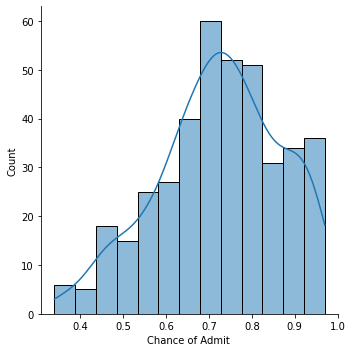

In [34]:
# univariate
plt.figure(figsize=(10,8))
sns.displot(admissions_df['Chance of Admit '], kde=True)
plt.show()

<Figure size 720x576 with 0 Axes>

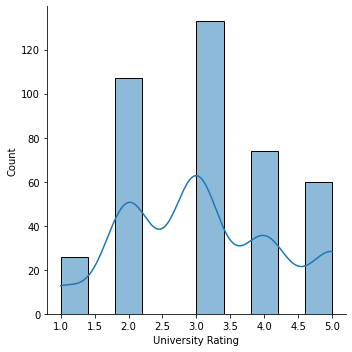

In [35]:
# univariate
plt.figure(figsize=(10,8))
sns.displot(admissions_df['University Rating'], kde=True)
plt.show()

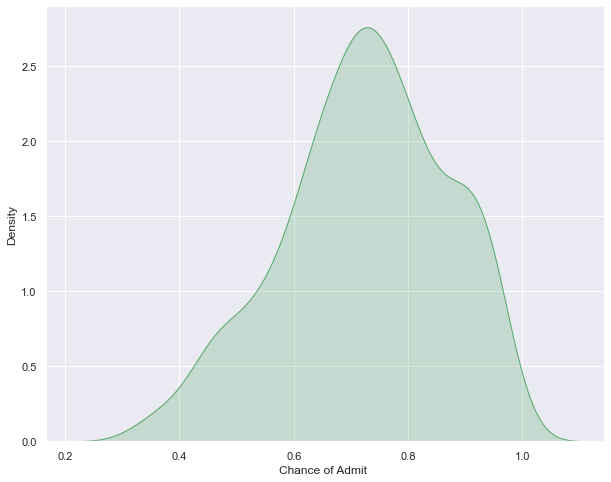

In [36]:
# univariate
plt.figure(figsize=(10,8))
sns.set(color_codes=True)
sns.kdeplot(admissions_df['Chance of Admit '], shade=True, color='g')
plt.show()

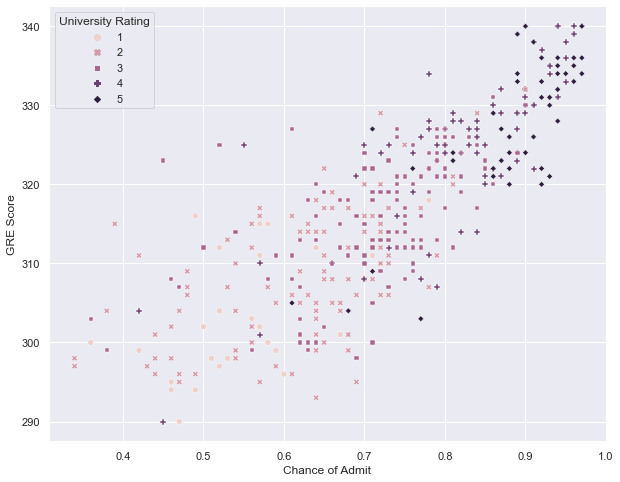

In [37]:
# multivariate
plt.figure(figsize=(10,8))
sns.scatterplot(y='GRE Score', x='Chance of Admit ', hue='University Rating', style='University Rating', data=admissions_df)
plt.show()

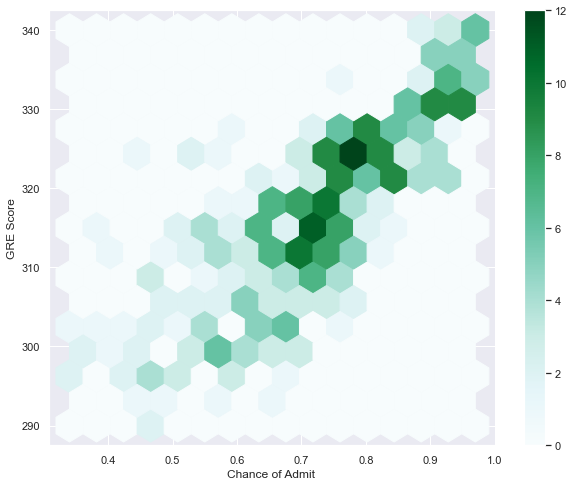

In [38]:
# bivariate
admissions_df.plot.hexbin(x='Chance of Admit ', y='GRE Score', gridsize=15, figsize=(10,8), sharex=False)
plt.show()

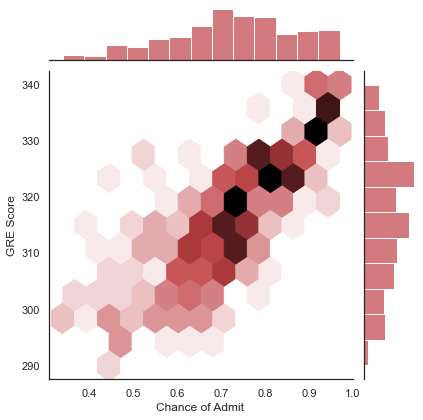

In [39]:
# bivariate
with sns.axes_style('white'):
    sns.jointplot(x='Chance of Admit ', y='GRE Score', data=admissions_df, kind='hex', color='r')
plt.show()

In [40]:
# correlation
admissions_df_corr = admissions_df.corr()
admissions_df_corr

,GRE Score,University Rating,Chance of Admit
GRE Score,1.000000,0.668976,0.80261
University Rating,0.668976,1.000000,0.71125
Chance of Admit,0.802610,0.711250,1.00000


<AxesSubplot:>

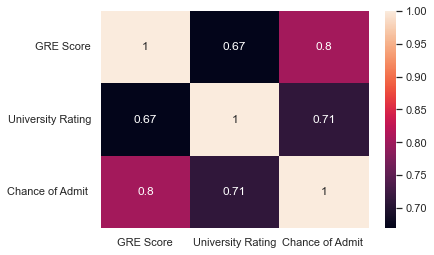

In [41]:
# correlation heat map
# multivariate
sns.heatmap(admissions_df_corr, annot=True)

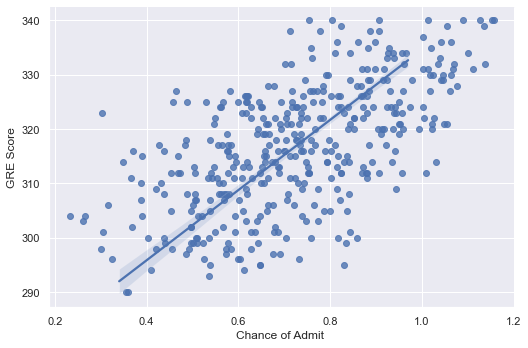

In [42]:
# bivariate
sns.lmplot(x='Chance of Admit ', y='GRE Score', data=admissions_df, aspect=1.5, x_jitter=0.2)
plt.show()

<Figure size 1152x864 with 0 Axes>

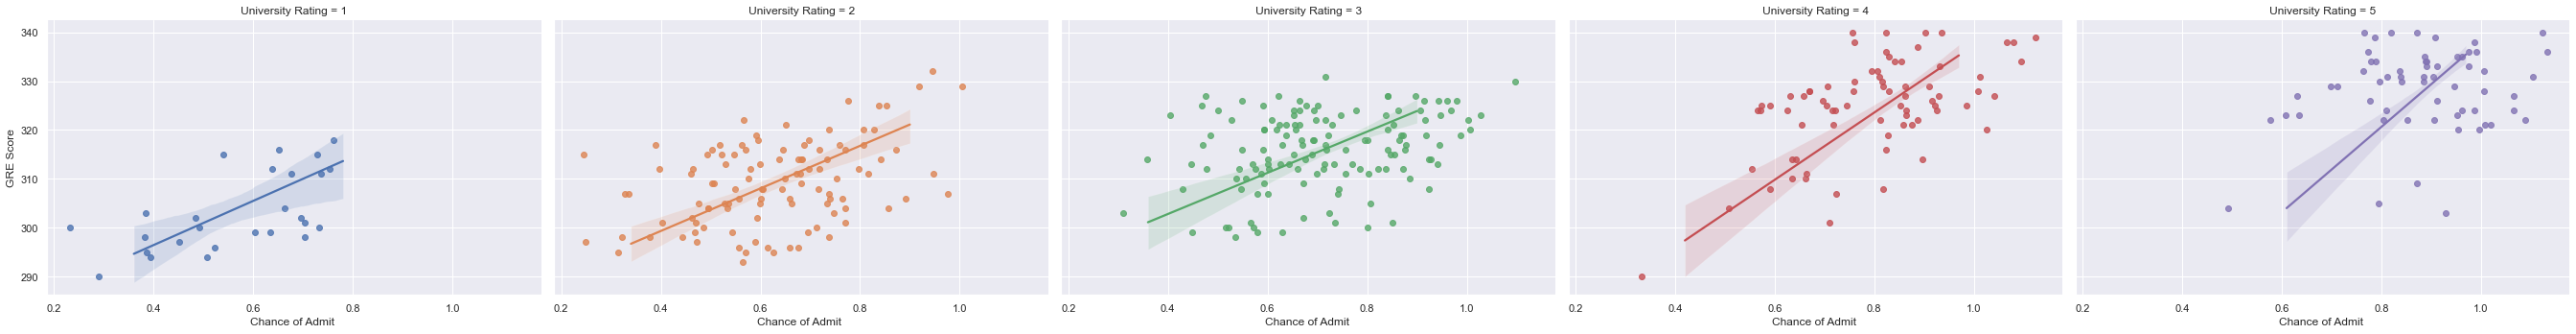

In [43]:
# multivariate
plt.figure(figsize=(16,12))
sns.lmplot(x='Chance of Admit ', y='GRE Score', data=admissions_df, aspect=1.5, x_jitter=0.2, col='University Rating', hue='University Rating')
plt.show()

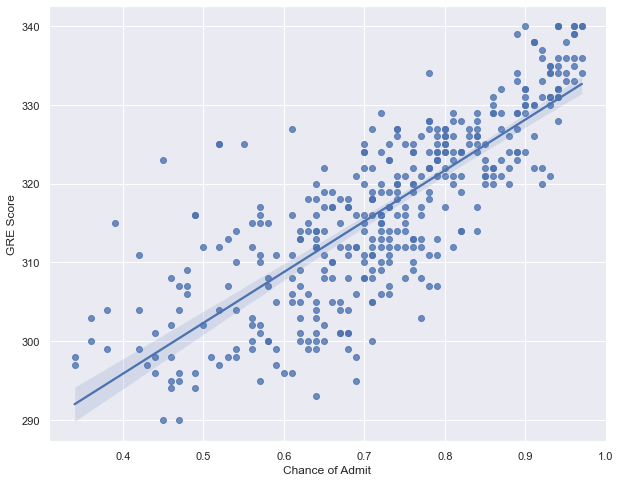

In [44]:
# bivariate
plt.figure(figsize=(10, 8))
sns.regplot(x='Chance of Admit ', y='GRE Score', data=admissions_df)
plt.show()

In [45]:
admissions_df.loc[:, ('High Score')] = (admissions_df['GRE Score']) > 320
admissions_df.head()

c:\users\wlmro\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,GRE Score,University Rating,Chance of Admit,High Score
0,337,4,0.92,True
1,324,4,0.76,True
2,316,3,0.72,False
3,322,3,0.80,True
4,314,2,0.65,False


In [46]:
# not sure why...but this has errors
# sns.pairplot(admissions_df, diag_kind='kde', hue='University Rating', height=2)
# plt.show()

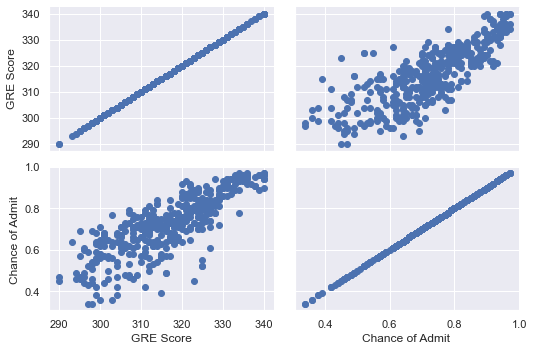

In [47]:
# multivariate..can add more vars...a good sub for sns.pairplot for this df
grid = sns.PairGrid(admissions_df, vars=['GRE Score', 'Chance of Admit '], aspect=1.5)
grid.map(plt.scatter)
plt.show()

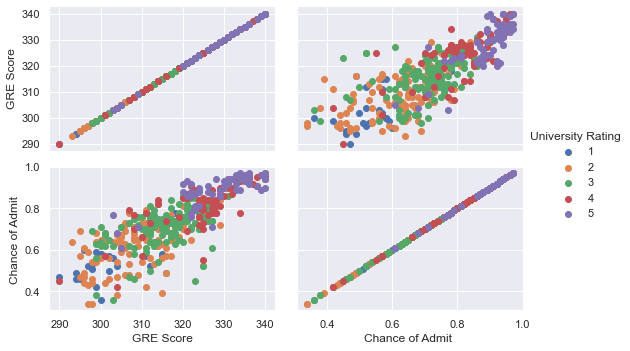

In [48]:
grid = sns.PairGrid(admissions_df, vars=['GRE Score', 'Chance of Admit '], hue='University Rating', aspect=1.5)

grid.map(plt.scatter)
# can add more plts with other map functions
grid.add_legend()

plt.show()

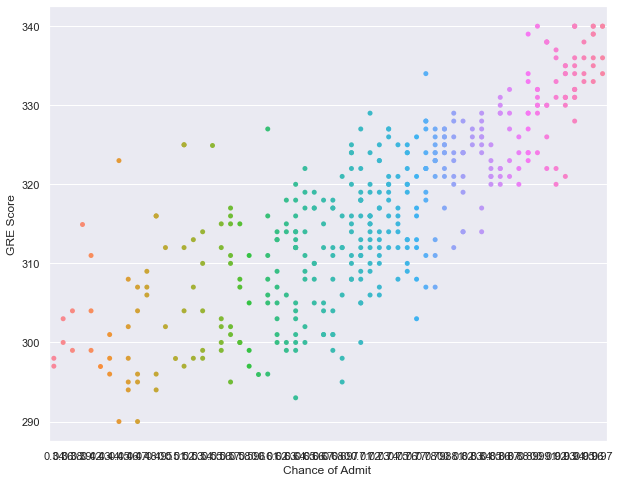

In [49]:
plt.figure(figsize=(10,8))
sns.stripplot(x='Chance of Admit ', y='GRE Score', data=admissions_df, jitter=False)
plt.show()

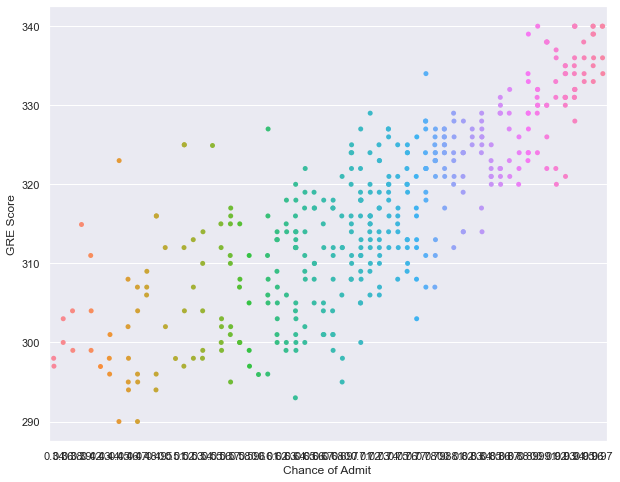

In [50]:
plt.figure(figsize=(10,8))
sns.stripplot(x='Chance of Admit ', y='GRE Score', data=admissions_df, jitter=0.04)
plt.show()

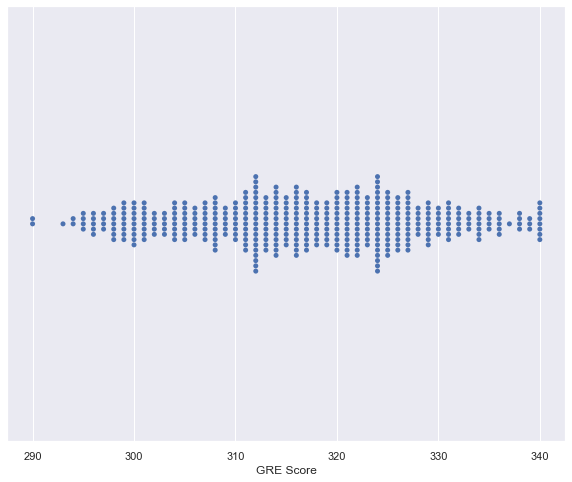

In [51]:
# distribution of data - where are they clustered? where are the outliers?
# univariate --- to plt multivariate data use sns.stripplot (above)
plt.figure(figsize=(10,8))
sns.swarmplot(x='GRE Score', data=admissions_df)
plt.show()

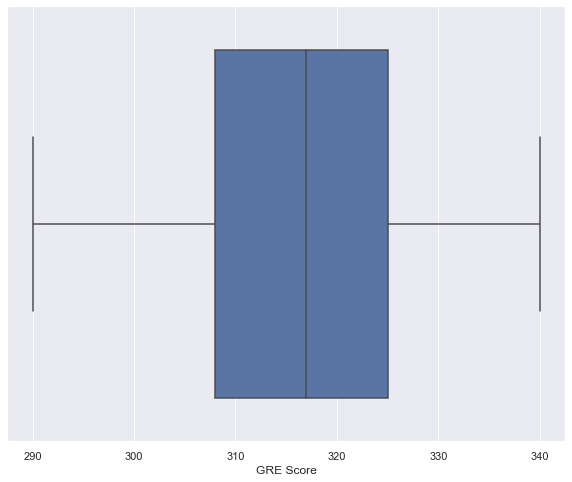

In [52]:
# univariate
plt.figure(figsize=(10,8))
sns.boxplot(x='GRE Score', data=admissions_df)
plt.show()

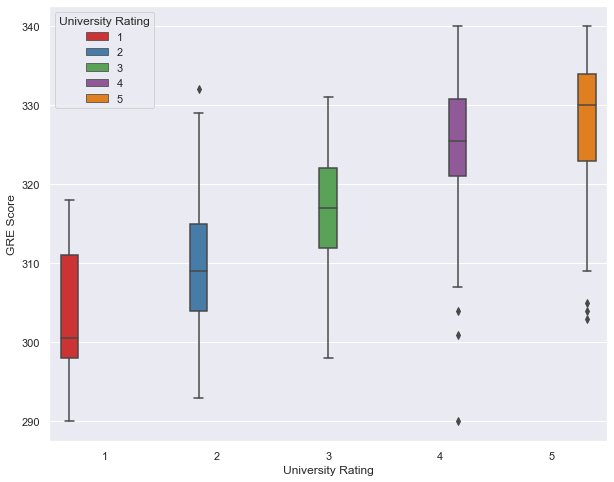

In [53]:
# multivariate
plt.figure(figsize=(10,8))
sns.boxplot(x='University Rating', y='GRE Score', hue='University Rating', palette='Set1', data=admissions_df)
plt.show()

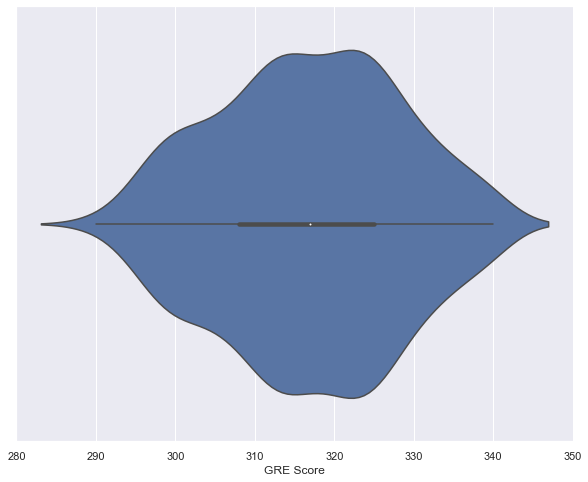

In [54]:
# univariate
plt.figure(figsize=(10,8))
sns.violinplot(x='GRE Score', data=admissions_df)
plt.show()

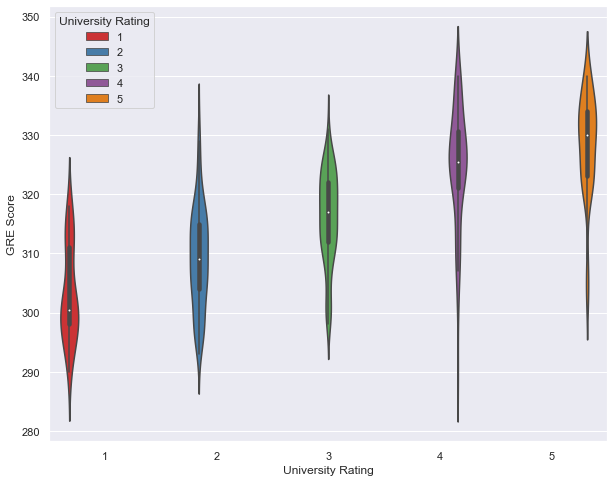

In [55]:
# multivariate
plt.figure(figsize=(10,8))
sns.violinplot(x='University Rating', y='GRE Score', hue='University Rating', palette='Set1', data=admissions_df)
plt.show()

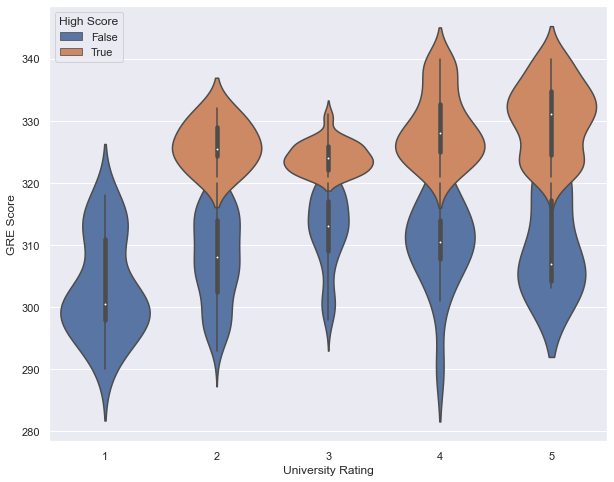

In [56]:
# multivariate
plt.figure(figsize=(10,8))
sns.violinplot(x='University Rating', y='GRE Score', hue='High Score', dodge=False, data=admissions_df)
plt.show()

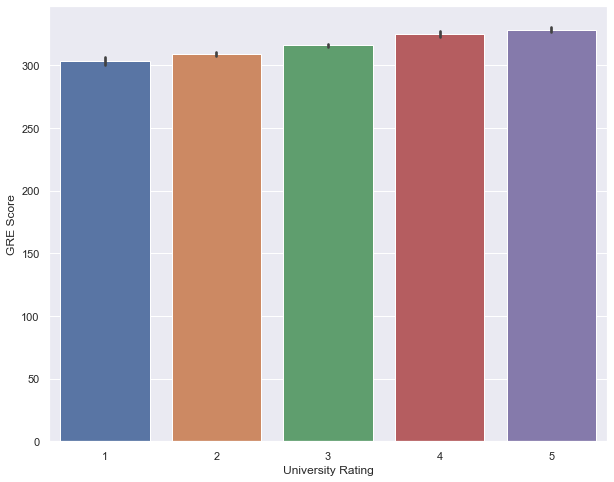

In [57]:
# bivariate
plt.figure(figsize=(10,8))
sns.barplot(x='University Rating', y='GRE Score', data=admissions_df)
plt.show()

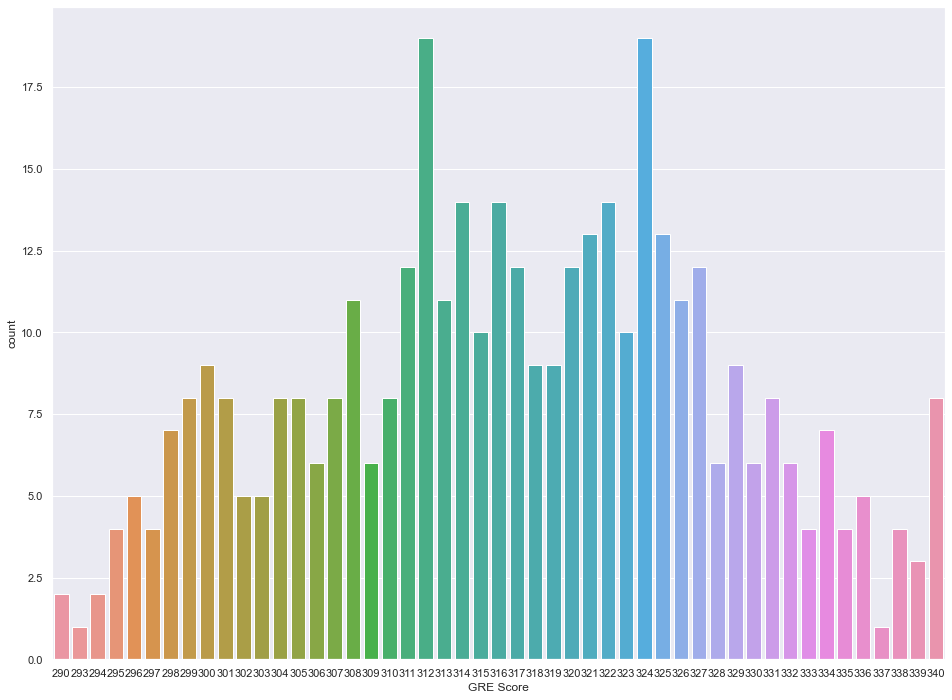

In [58]:
# univariate
plt.figure(figsize=(16,12))
sns.countplot(x='GRE Score', data=admissions_df)
plt.show()

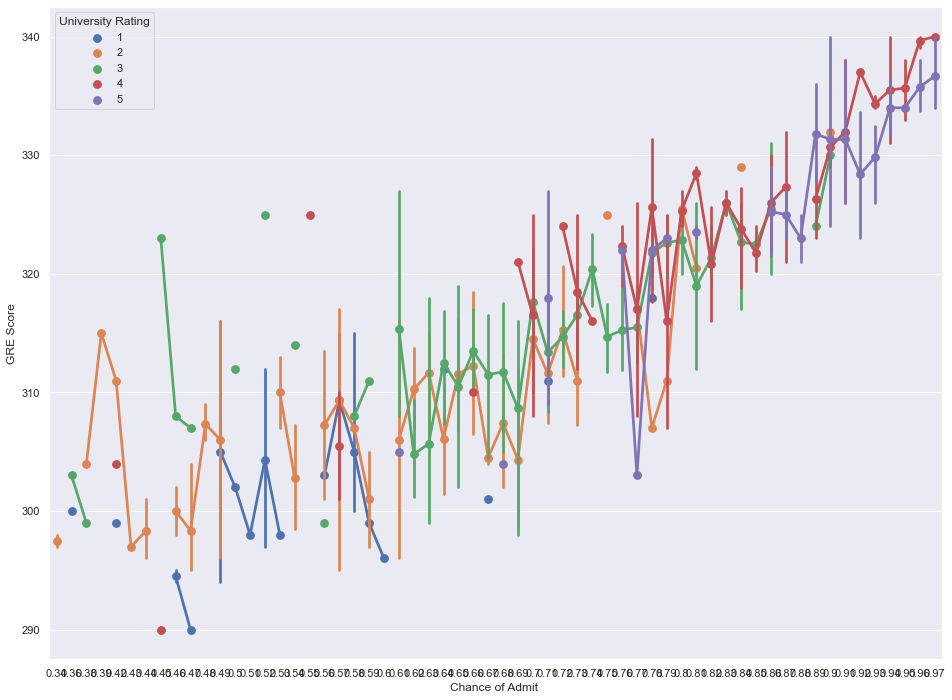

In [59]:
# multivariate
plt.figure(figsize=(16,12))
sns.pointplot(x='Chance of Admit ', y='GRE Score', hue='University Rating', data=admissions_df)
plt.show()

<Figure size 720x576 with 0 Axes>

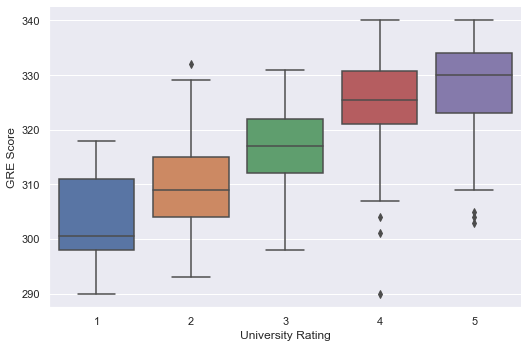

In [60]:
# bivariate
# catplot - categorical plot
# we can see outliers here
plt.figure(figsize=(10,8))
sns.catplot(x='University Rating', y='GRE Score', kind='box', data=admissions_df, aspect=1.5)
plt.show()

In [61]:
# axis 1 = by each sample
x=admissions_df.drop(['Chance of Admit ', 'High Score'], axis=1)
y=admissions_df['Chance of Admit ']
x.shape, y.shape

((400, 2), (400,))

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((320, 2), (320,), (80, 2), (80,))

In [63]:
import statsmodels.api as sm

x_train_with_intercept = sm.add_constant(x_train)
stats_model = sm.OLS(y_train, x_train_with_intercept)
fit_model = stats_model.fit()

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

linear_model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
linear_model.fit(x_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

In [65]:
y_pred_train = linear_model.predict(x_train)

from sklearn.metrics import r2_score

r2_score(y_pred_train, y_train)

0.5806122092009451

In [66]:
y_pred_test = linear_model.predict(x_test)

r2_score(y_pred_test, y_test)

0.5367001790517447